In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [59]:
df = pd.read_csv('/home/nicoli/github/ssd_keras/dataset/csv/imdb_csv/imdb.csv', index_col=0)

In [60]:
df_sorted = df.sort_values(by='celeb_id', axis=0)

In [61]:
df_sorted.isnull().sum()

celeb_id                  0
name                      0
full_path                 0
face_score                0
second_face_score    246926
xmin                      0
xmax                      0
ymin                      0
ymax                      0
dob_date                129
photo_taken               0
age                     129
gender                 8462
dtype: int64

## Remover itens com idade ou gênero nulos

In [63]:
df_sorted.dropna(subset=['gender', 'age'], axis=0, inplace=True)

In [64]:
df_sorted.isnull().sum()

celeb_id                  0
name                      0
full_path                 0
face_score                0
second_face_score    242679
xmin                      0
xmax                      0
ymin                      0
ymax                      0
dob_date                  0
photo_taken               0
age                       0
gender                    0
dtype: int64

## Remover itens com rostos não identificados

In [65]:
df_sorted.drop(df_sorted.loc[df_sorted['face_score']==-np.inf].index, inplace=True)

In [66]:
df_sorted.shape, df.shape

((391087, 13), (460723, 13))

## Remover itens com mais de um rosto identificado

In [78]:
df_sorted_final = df_sorted.drop(df_sorted.loc[df_sorted['second_face_score'].notnull()].index)

In [92]:
df_sorted_final.drop('second_face_score', inplace=True, axis=1)

In [93]:
df_sorted_final.shape

(181634, 12)

## Pegar descrição da quantidade de itens por celebridaade

In [111]:
df_sorted_final.groupby('celeb_id').size().describe()

count    14624.000000
mean         3.283301
std          3.714558
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         38.000000
dtype: float64

In [112]:
df_sorted.groupby('celeb_id').size().describe()

count    18461.000000
mean        21.184497
std         50.815294
min          1.000000
25%          2.000000
50%          5.000000
75%         15.000000
max        796.000000
dtype: float64

## Remover itens com id, idade e gênero repetidos

In [108]:
df_sorted_final.drop_duplicates(subset=['celeb_id', 'age', 'geder'], inplace=True)

In [110]:
df_sorted_final.shape

(48015, 12)

## Remover itens de celebridades com mais de 50 imagens

In [113]:
keys = df_sorted_final.groupby('celeb_id').groups.keys()

In [114]:
def drop_celeb_ids_items(df_celeb_id, qtd):
    if df_celeb_id.shape[0] >50:
        return df_celeb_id.sample(df_celeb_id.shape[0] - 50).index

In [115]:
celeb_ids = df_sorted_final.groupby('celeb_id').size()[df_sorted_final.groupby('celeb_id').size()>50].index

In [116]:
df_sorted_50 = df_sorted_final.copy()

In [117]:
for celeb_id in celeb_ids:
    df_celeb_id = df_sorted_final.groupby('celeb_id').get_group(celeb_id)
    df_sorted_50.drop(drop_celeb_ids_items(df_celeb_id,50), axis=0, inplace=True)

In [118]:
df_sorted_50.groupby('celeb_id').size()[df_sorted_50.groupby('celeb_id').size()>50]

Series([], dtype: int64)

## Remover idades negativas e acime de 100 anos

In [119]:
df_sorted_50.drop(df_sorted_50[df_sorted_50.age<0].index, inplace=True)

In [120]:
df_sorted_50.drop(df_sorted_50[df_sorted_50.age>100].index, inplace=True)

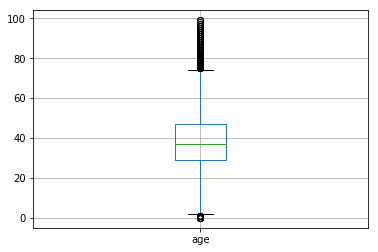

In [121]:
df_sorted_50.boxplot('age')

## Salvar dfs

In [124]:
df_sorted_50.to_csv('/home/nicoli/github/ssd_keras/dataset/csv/imdb_csv/imdb_clean.csv')

In [125]:
df_sorted_50.shape, df_sorted_final.shape

((47950, 12), (48015, 12))